In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load file

In [28]:
# load results.csv to a dataframe
df = pd.read_csv('logs/results.csv')
df.head()

,module,revisions,code
0,vllm/engine/arg_utils.py,618,1764
1,vllm/v1/worker/gpu_model_runner.py,564,4332
2,.buildkite/test-pipeline.yaml,515,1289
3,vllm/envs.py,379,1109
4,vllm/engine/llm_engine.py,334,2


In [40]:
# limit to the first 50 modules for better visualization
df = df.head(50)

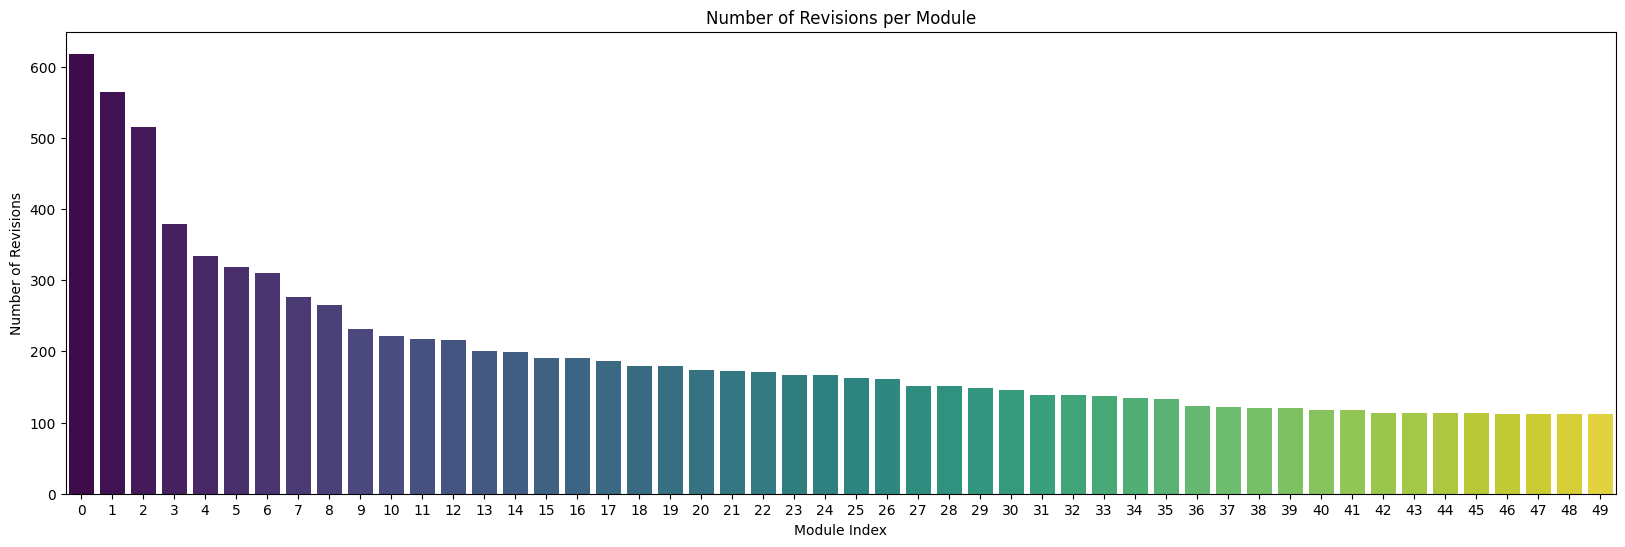

In [42]:
# plot revision over each module
plt.figure(figsize=(20, 6))
sns.barplot(data=df, x=df.index, y='revisions',hue= df.index, palette='viridis', legend=False)
plt.title('Number of Revisions per Module')
plt.xlabel('Module Index')
plt.ylabel('Number of Revisions')
plt.show()

In [31]:
# return the top module with the highest technical debt
top_td_module = df.iloc[0] # already sorted by revisions then LOC
top_td_module

module       vllm/engine/arg_utils.py
revisions                         618
code                             1764
Name: 0, dtype: object

### Complexity analysis using indentation as metric

- n – total number of lines
- Total – total complexity (indention number)
- Mean and SD – mean and standard deviation (2.42 means each line on average has two indentions)
- Max – largest complexity (indention number)

In [32]:
!python scripts_4/complexity_analysis.py vllm/vllm/engine/arg_utils.py

n,total,mean,sd,max
1941,4550.0,2.34,1.1,6.0


In [33]:
!cloc vllm/vllm/engine/arg_utils.py

       1 text file.
       1 unique file.                              
       0 files ignored.

github.com/AlDanial/cloc v 1.98  T=0.02 s (46.6 files/s, 99240.4 lines/s)
-------------------------------------------------------------------------------
Language                     files          blank        comment           code
-------------------------------------------------------------------------------
Python                           1            187            177           1764
-------------------------------------------------------------------------------


## Complexity from code shape

So we can use this calculate the complexity for a particular revision. But the trends of the complexity is what that is of more interest to us. In a Git Bash Shell: We need to get the hash commits for the pull request for the period of time to dive deeper into this file.

Span from [214efc2c3] Maximilien de Bayser 2024-11-24 Support Cross encoder models (#10400) to [c25dbee40] Cyrus Leung 2026-01-27 [Model] Bump transformers version for test registry (#33100).

In [34]:
# run git complexity trend analysis script
# make sure you are in vllm repo so git command works on the intended repo
!cd vllm && python /workspaces/UC26_Software_Architecture/assignment1/scripts_4/git_complexity_trend.py --start "214efc2" --end "c25dbee" --file "vllm/engine/arg_utils.py" > /workspaces/UC26_Software_Architecture/assignment1/logs/git_complexity_trend.csv


### load git_complexity_trend.csv

In [35]:
gct_df = pd.read_csv('logs/git_complexity_trend.csv')
gct_df.head()

,rev,n,total,mean,sd
0,25d806e95,1129,3653.75,3.24,1.88
1,c27df94e1,1129,3653.75,3.24,1.88
2,519e8e418,1170,3778.75,3.23,1.88
3,9a99273b4,1173,3787.75,3.23,1.87
4,d9b4b3f06,1177,3790.75,3.22,1.86


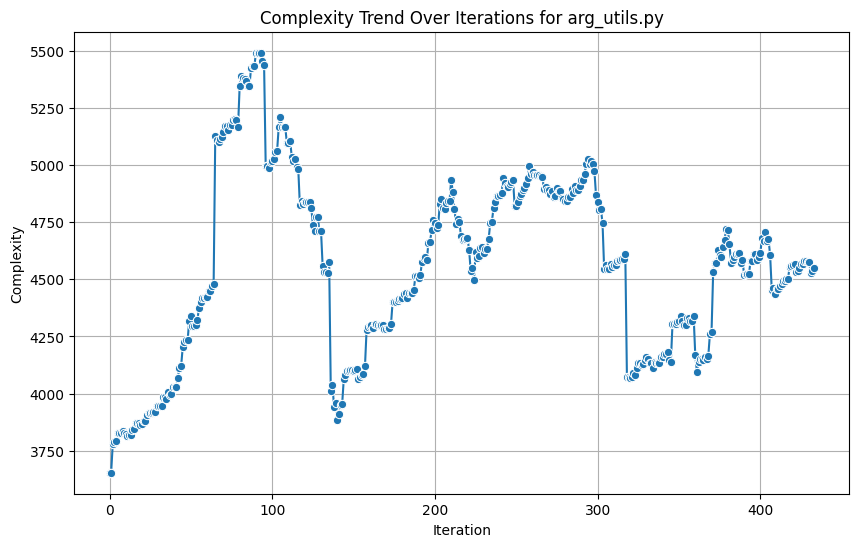

In [36]:
# plot the trend of complexity iteration
plt.figure(figsize=(10, 6))
sns.lineplot(data=gct_df, x=gct_df.index, y='total', marker='o')
plt.title('Complexity Trend Over Iterations for arg_utils.py')
plt.xlabel('Iteration')
plt.ylabel('Complexity')
plt.grid(True)
plt.show()